# Regularization

Overfitting occurs when the model used to fit the data becomes too complex, to the point where it's way too specific. We want the fitting function to perform well but not be too complicated.

The way we can do this is by adding a **regularization term** to the loss.

Let's see how this works by generating a dataset and fitting a very complex function to it.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
def generate_data():
    n_data_points = 100
    x = list(range(n_data_points))
    y = [1.2*i**3 + 8*i**2 + np.random.rand()*200000 for i in x]
    return x, y

In [16]:
x, y = generate_data()

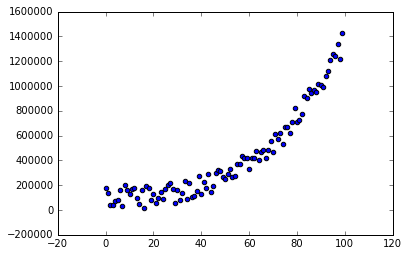

In [17]:
plt.scatter(x, y)

In [115]:
parameters = np.random.rand(5)
def model():
    p = parameters
    return [p[4]*i**5 + p[3]*i**4 + p[2]*i**3 + p[1]*i**2 + p[0]*i for i in x]
def loss(y_guess, y):
    diff_squared = [(i-j)**2 for i, j in zip(y_guess, y)]
    return sum(diff_squared)**0.5/len(y)
learning_rate = 0.00000000000000001
loss_history = []
def gradient_descent(y_guess):
    global parameters
    for p in range(5):
        grad = 2*sum([(i-j)*x**p for i, j, x in zip(y_guess, y, x)])/len(y)
        parameters[p] -= grad * learning_rate
def train():
    for i in range(100):
        y_guess = model()
        current_loss = loss(y_guess, y)
        loss_history.append(current_loss)
        gradient_descent(y_guess)

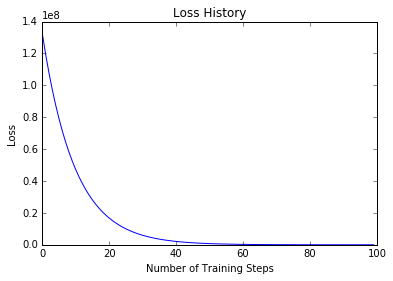

In [116]:
train()
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Number of Training Steps")
plt.ylabel("Loss")

[  9.15351271e-01   3.84588620e-02   7.55996168e-01   4.79897311e-02
  -4.32643856e-04]


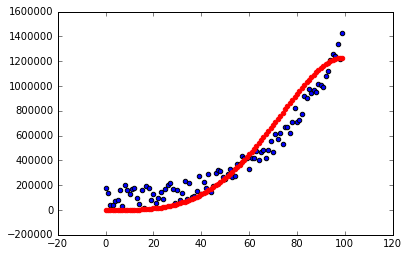

In [117]:
print(parameters)
plt.scatter(x, y)
plt.scatter(x, model(), color='red')

We see that this function fit is not very good. The resulting function we ended up with was **-0.00043\*x^5 + 0.048\*x^4 + 0.756\*x^3 + 0.0385\*x^2 + 0.915\*x**, as opposed to **1.2\*x^3 + 8\*x^2**.

In this case, the function fit wasn't even very good. The algorithm tried too hard to fit the extra terms in the equation.

In [ ]:
We can add a **regularization term** to the loss function, which discourages the 